Matrix A1 (∂²x + ∂²y):
 [[-0.64  0.16  0.   ...  0.    0.    0.  ]
 [ 0.16 -0.64  0.16 ...  0.    0.    0.  ]
 [ 0.    0.16 -0.64 ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ... -0.64  0.16  0.  ]
 [ 0.    0.    0.   ...  0.16 -0.64  0.16]
 [ 0.    0.    0.   ...  0.    0.16 -0.64]]


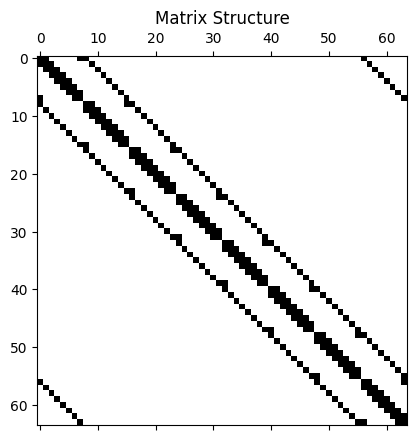

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

L = 10
m = 8
n = m * m
grid = np.linspace(-L, L, m+1)
dx = grid[1] - grid[0] # also: dx = 2*L/(m)

e0 = np.zeros((n, 1))  # vector of zeros
e1 = np.ones((n, 1))   # vector of ones
e2 = np.copy(e1)    # copy the one vector
e4 = np.copy(e0)    # copy the zero vector

for j in range(1, m+1):
    e2[m*j-1] = 0  # overwrite every m^th value with zero
    e4[m*j-1] = 1  # overwirte every m^th value with one

# Shift to correct positions
e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1]

e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1]

# Place diagonal elements
diagonals = [e1.flatten(), e1.flatten(), e5.flatten(),
             e2.flatten(), -4 * e1.flatten(), e3.flatten(),
             e4.flatten(), e1.flatten(), e1.flatten()]
offsets = [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)]

matA = spdiags(diagonals, offsets, n, n).toarray()
A1 = matA/(dx**2)
#Plot matrix structure
plt.figure(5)
plt.spy(matA)
plt.title('Matrix Structure')
# plt.show()

print("Matrix A1 (∂²x + ∂²y):\n", A1)

Matrix A2 (∂x):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


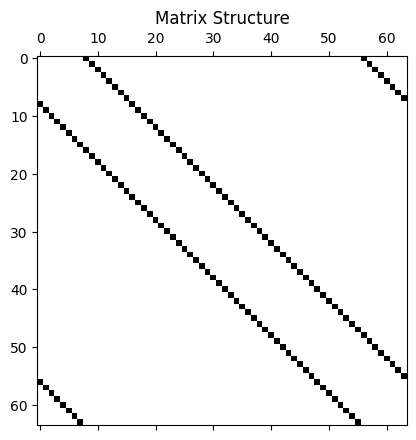

In [ ]:
L = 10
m = 8
n = m * m
grid = np.linspace(-L, L, m+1)
dx = grid[1] - grid[0] # also: dx = 2*L/(m)

e0 = np.zeros((n, 1))  # vector of zeros
e1 = np.ones((n, 1))   # vector of ones

diagonals = [e1.flatten(), -1*e1.flatten(), e0.flatten(),
             e1.flatten(), -1*e1.flatten()]
offsets = [-(n-m), -m, 0, m, (n-m)]

matA = spdiags(diagonals, offsets, n, n).toarray()
A2 = matA/(dx*2)
# Plot matrix structure
plt.figure(5)
plt.spy(A2)
plt.title('Matrix Structure')
# plt.show()

print("Matrix A2 (∂x):\n", A2)

Matrix A3 (∂y):
 [[ 0.   0.2  0.  ...  0.   0.   0. ]
 [-0.2  0.   0.2 ...  0.   0.   0. ]
 [ 0.  -0.2  0.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.   0.2  0. ]
 [ 0.   0.   0.  ... -0.2  0.   0.2]
 [ 0.   0.   0.  ...  0.  -0.2  0. ]]


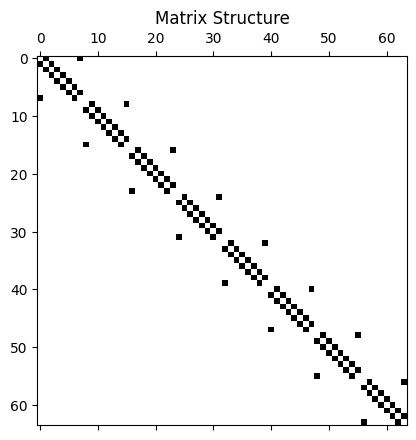

In [ ]:
e0 = np.zeros((n, 1))  # vector of zeros
e1 = np.ones((n, 1))   # vector of ones
e2 = np.copy(e1)    # copy the one vector
e4 = np.copy(e0)    # copy the zero vector

for j in range(1, m+1):
    e2[m*j-1] = 0  # 111011101110
    e4[m*j-1] = 1  # 000100010001

# Shift to correct positions
e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1] # 011101110111

e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1] # 100010001000

# Place diagonal elements
diagonals = [e5.flatten(),
             -1* e2.flatten(), e0.flatten(), e3.flatten(),
             -1*e4.flatten()]
offsets = [-m+1, -1, 0, 1, m-1]

matA = spdiags(diagonals, offsets, n, n).toarray()
A3 = matA/(dx*2)
# Plot matrix structure
plt.figure(5)
plt.spy(A3)
plt.title('Matrix Structure')
# plt.show()

print("Matrix A3 (∂y):\n", A3)